In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df = pd.read_csv("KDDTrain+.csv", names = feature)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,0,14,4,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,3
1,0,1,42,4,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,3
2,0,0,63,7,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0,20,4,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,3
4,0,0,20,4,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
from scipy.stats import pearsonr

In [16]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [17]:
for i in range(np.shape(features)[1]):
    if(np.std(features[:,i])!=0):
        features[:,i] = (features[:,i]-np.mean(features[:,i]))/np.std(features[:,i]) 
    else:
        features[:,i] = (features[:,i]-np.mean(features[:,i]))
np.shape(features)

(125973, 41)

In [18]:
np.shape(features),np.shape(labels)

((125973, 41), (125973,))

In [21]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(features,labels)

In [22]:
set(train_Y)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [24]:
print(np.shape(train_X),np.shape(test_X),np.shape(train_Y),np.shape(test_Y))

(94479, 41) (31494, 41) (94479,) (31494,)


# Stacked Attention Auto Encoder

### First Stack

In [25]:
from keras.layers import *
from keras.models import Model
from keras_self_attention import SeqSelfAttention

In [26]:
batch_size = 128
input_dim = np.shape(train_X)[1]
#Input Layer

input_layer = Input(shape=(input_dim), name='input')
#Encoder’s first dense layer
encoder = Dense (128, activation='relu')(input_layer)
#Encoder’s second dense layer
encoder = Dense (64, activation='relu')(encoder)
# Code layer
latent_layer = Dense (32, activation='relu',name = 'latent_1')(encoder)
# Decoder’s first dense layer
decoder = Dense(64, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(128, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(256, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [27]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [28]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 41)]              0         
                                                                 
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 latent_1 (Dense)            (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024 

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [31]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
739/739 [==============================] - 6s 8ms/step - loss: 0.5885 - accuracy: 0.6360 - val_loss: 0.7121 - val_accuracy: 0.5842
Epoch 2/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5808 - accuracy: 0.6757 - val_loss: 0.7090 - val_accuracy: 0.7428
Epoch 3/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5688 - accuracy: 0.6788 - val_loss: 0.7035 - val_accuracy: 0.4395
Epoch 4/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5650 - accuracy: 0.7073 - val_loss: 0.7029 - val_accuracy: 0.8407
Epoch 5/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5704 - accuracy: 0.7070 - val_loss: 0.6995 - val_accuracy: 0.6624
Epoch 6/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5718 - accuracy: 0.6929 - val_loss: 0.6989 - val_accuracy: 0.7074
Epoch 7/100
739/739 [==============================] - 5s 7ms/step - loss: 0.5805 - accuracy: 0.7144 - val_loss: 0.6983 - val_accuracy: 0.6818

In [32]:
pred = autoencoder_1.predict(features)

3937/3937 [==============================] - 10s 2ms/step


In [33]:
from sklearn.metrics import *
import keras

In [34]:
np.sum(keras.losses.mean_squared_error(pred,features))/len(features)

0.5965605302776494

In [35]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(features)

3937/3937 [==============================] - 7s 2ms/step


### Second Stack

In [36]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
encoder = Dense (128, activation='relu')(input_layer)
#Encoder’s first dense layer
encoder = Dense (64, activation='relu')(encoder)
#Encoder’s second dense layer
encoder = Dense (32, activation='relu')(encoder)
# Code layer
latent_layer = Dense (16, activation='relu',name = 'latent_2')(encoder)
# Decoder’s first dense layer
decoder = Dense(32, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(64, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(128, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [37]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [38]:
autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 latent_2 (Dense)            (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [42]:
train_intX,test_intX,train_intY,test_intY = train_test_split(intermediate_output_1,labels)

In [43]:
stack_2 = autoencoder_2.fit(train_intX, train_intX, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intX))

Epoch 1/100
2953/2953 [==============================] - 11s 3ms/step - loss: 0.1557 - accuracy: 0.8275 - val_loss: 0.0276 - val_accuracy: 0.9024
Epoch 2/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0377 - accuracy: 0.9095 - val_loss: 0.0214 - val_accuracy: 0.9223
Epoch 3/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0308 - accuracy: 0.9140 - val_loss: 0.0228 - val_accuracy: 0.9348
Epoch 4/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0336 - accuracy: 0.9207 - val_loss: 0.0226 - val_accuracy: 0.9166
Epoch 5/100
2953/2953 [==============================] - 10s 3ms/step - loss: 0.0449 - accuracy: 0.9128 - val_loss: 0.0190 - val_accuracy: 0.9376
Epoch 6/100
2953/2953 [==============================] - 10s 4ms/step - loss: 0.0296 - accuracy: 0.9270 - val_loss: 0.0258 - val_accuracy: 0.9241
Epoch 7/100
2953/2953 [==============================] - 19s 6ms/step - loss: 0.0257 - accuracy: 0.9345 - val_loss: 0.0365 -

In [44]:
pred = autoencoder_2.predict(intermediate_output_1)

3937/3937 [==============================] - 10s 2ms/step


In [45]:
np.sum(keras.losses.mean_squared_error(pred,intermediate_output_1))/len(intermediate_output_1)

0.013712337384548674

In [46]:
layer_name = 'latent_2'
intermediate_layer_model = Model(inputs=autoencoder_2.input,
                                 outputs=autoencoder_2.get_layer(layer_name).output)
intermediate_output_2 = intermediate_layer_model.predict(intermediate_output_1)

3937/3937 [==============================] - 8s 2ms/step


### Classifier Model

In [47]:
batch_size = 32
input_dim = np.shape(intermediate_output_2)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
dense1 = Dense (128, activation='relu')(input_layer)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [48]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [49]:
train_intX, test_intX , train_intY ,test_intY = train_test_split(intermediate_output_2,labels,random_state = 42,test_size = 0.1)

In [50]:
history = classify.fit(train_intX, train_intY, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intY))

Epoch 1/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.1511 - accuracy: 0.9584 - val_loss: 0.0787 - val_accuracy: 0.9737
Epoch 2/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0656 - accuracy: 0.9782 - val_loss: 0.0604 - val_accuracy: 0.9827
Epoch 3/100
3543/3543 [==============================] - 18s 5ms/step - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 4/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0473 - accuracy: 0.9842 - val_loss: 0.0501 - val_accuracy: 0.9819
Epoch 5/100
3543/3543 [==============================] - 18s 5ms/step - loss: 0.0427 - accuracy: 0.9849 - val_loss: 0.0428 - val_accuracy: 0.9871
Epoch 6/100
3543/3543 [==============================] - 18s 5ms/step - loss: 0.0397 - accuracy: 0.9861 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 7/100
3543/3543 [==============================] - 18s 5ms/step - loss: 0.0364 - accuracy: 0.9873 - val_loss: 0.0425 -

In [51]:
preds = classify.predict(test_intX)

394/394 [==============================] - 1s 2ms/step


In [52]:
np.shape(preds),np.shape(test_intY)

((12598, 5), (12598,))

In [53]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), test_intY)

In [57]:
print(accuracy_score(np.argmax(preds,axis = 1),test_intY))
print(precision_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))

0.9928560088903
0.748542160905706
0.7854646187616355
0.7648376733943516


C:\Users\ArrunPersonal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
import seaborn as sns

<AxesSubplot:>

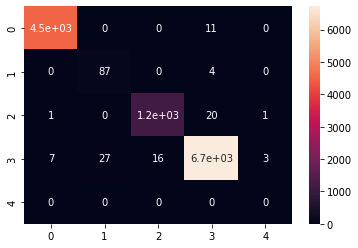

In [59]:
sns.heatmap(conf_mat, annot=True)